#**Temporal and Correlation Analysis**

**Flowchart**

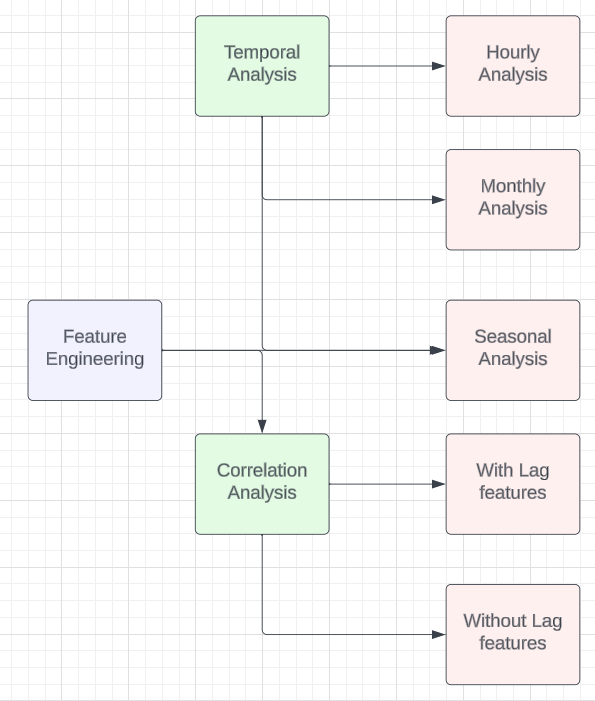


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Load the Dataset**

In [ ]:
# Load the dataset
from google.colab import files

# Prompt the user to upload a file
uploaded = files.upload()

# Get the file name
file_name = next(iter(uploaded))

# Read the uploaded file
df = pd.read_csv(file_name)

Saving merged_df.csv to merged_df (3).csv


**Temporal** **Analysis**

In [ ]:
# Convert the date columns to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])

**Hourly Analysis**

In [ ]:
import plotly.express as px

# Filter the DataFrame for the year 2022
df_2022 = df[df['Year'] == 2022]

# Randomly select 6 days from the year 2022
random_days_2022 = df_2022.sample(n=6, random_state=42)

# Create an interactive plot for each randomly selected day
fig = px.line(labels={'Hour': 'Hour of the Day', 'GHI': 'Mean Global Horizontal Irradiance (GHI)'})

# Perform hourly analysis for each randomly selected day and create separate traces
for _, row in random_days_2022.iterrows():
    day_data = df_2022[(df_2022['Month'] == row['Month']) & (df_2022['Day'] == row['Day'])]
    hourly_mean_day = day_data.groupby('Hour')['GHI'].mean()

    # Add trace for each day
    fig.add_scatter(x=hourly_mean_day.index, y=hourly_mean_day.values,
                    mode='lines',
                    name=row['Date'].strftime("%Y-%m-%d"))

# Update layout
fig.update_layout(title='Hourly Analysis of Mean GHI for 6 Randomly Selected Days in 2022',
                  title_x=0.5, title_font_size=20,
                  xaxis_title='Hour of the Day', yaxis_title='Mean GHI',
                  font=dict(family="Arial, sans-serif", size=12))

# Show plot
fig.show()

**Monthly Analysis**

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with four columns for each year
fig = make_subplots(rows=1, cols=4, subplot_titles=[f'Monthly Variation - {year}' for year in range(2019, 2023)])

# Iterate through each year and create a bar plot for each year
for i, year in enumerate(range(2019, 2023)):
    yearly_data = df[df['Year'] == year]
    monthly_mean_yearly = yearly_data.groupby('Month')['GHI'].mean().reset_index()

    # Add bar trace for each year
    fig.add_trace(
        go.Bar(x=monthly_mean_yearly['Month'], y=monthly_mean_yearly['GHI'], name=str(year)),
        row=1, col=i+1
    )

# Update layout
fig.update_layout(
    title="Monthly Variation Analysis",
    xaxis_title="Month",
    yaxis_title="Mean Global Horizontal Irradiance (GHI)",
    xaxis={'type': 'category', 'categoryorder': 'array', 'categoryarray': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']},  # Set correct order for months
    showlegend=False
)

# Update subplot titles
for i, year in enumerate(range(2019, 2023)):
    fig.update_xaxes(title_text=f"Month", row=1, col=i+1)
    fig.update_yaxes(title_text=f"Mean GHI", row=1, col=i+1)

# Show the interactive plot
fig.show()


**Feature Engineering**

In [ ]:
df['Month'] = df['Date'].dt.month

In [ ]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

df['Season'] = df['Month'].apply(get_season)

In [ ]:
lag_hours = 24
df['ClearskyDHI_Lag'] = df['Clearsky DHI'].shift(lag_hours)

In [ ]:
for lag in [1, 3, 6, 12]:
    df[f'ClearskyDHI_Lag_{lag}'] = df['Clearsky DHI'].shift(lag)

In [ ]:
window_size = 3
df['ClearskyDHI_RollingMean'] = df['Clearsky DHI'].rolling(window=window_size).mean()

In [ ]:
df['ClearskyDHI_SameHour_LastWeek'] = df['Clearsky DHI'].shift(24*7)
df['ClearskyDHI_SameHour_LastMonth'] = df['Clearsky DHI'].shift(24*30)

In [ ]:
from sklearn.impute import KNNImputer

# List of columns with missing values
cols_to_impute = ['ClearskyDHI_Lag', 'ClearskyDHI_Lag_1', 'ClearskyDHI_Lag_3', 'ClearskyDHI_Lag_6',
                  'ClearskyDHI_Lag_12', 'ClearskyDHI_RollingMean', 'ClearskyDHI_SameHour_LastWeek', 'ClearskyDHI_SameHour_LastMonth']

# Instantiate KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Impute missing values in selected columns
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

In [ ]:
df.head()

Year  Month  Day  Hour  Minute  Latitude  Longitude  Clearsky DHI  \
0  2021      1    1     0       0     35.08    -106.65             0   
1  2021      1    1     1       0     35.08    -106.65             0   
2  2021      1    1     2       0     35.08    -106.65             0   
3  2021      1    1     3       0     35.08    -106.65             0   
4  2021      1    1     4       0     35.08    -106.65             0   

   Clearsky DNI  Clearsky GHI  ...                Date  Season  \
0             0             0  ... 2021-01-01 00:00:00  Winter   
1             0             0  ... 2021-01-01 01:00:00  Winter   
2             0             0  ... 2021-01-01 02:00:00  Winter   
3             0             0  ... 2021-01-01 03:00:00  Winter   
4             0             0  ... 2021-01-01 04:00:00  Winter   

   ClearskyDHI_Lag  ClearskyDHI_Lag_1  ClearskyDHI_Lag_3  ClearskyDHI_Lag_6  \
0        42.921267           42.91992          42.920165          42.920532   
1         0.000000            0.00000           0.000000           0.000000   
2         0.000000            0.00000           0.000000           0.000000   
3         0.000000            0.00000           0.000000           0.000000   
4         0.000000            0.00000           0.000000           0.000000   

   ClearskyDHI_Lag_12  ClearskyDHI_RollingMean  ClearskyDHI_SameHour_LastWeek  \
0           42.920417                42.920042                      42.929618   
1            0.000000                 0.000000                       0.000000   
2           15.000000                 0.000000                       0.000000   
3           38.000000                 0.000000                       0.000000   
4           38.000000                 0.000000                       0.000000   

   ClearskyDHI_SameHour_LastMonth  
0                       42.960881  
1                        0.000000  
2                        0.000000  
3                        0.000000  
4                        0.000000  

[5 rows x 33 columns]

**Seasonal Analysis**

In [ ]:
# Subset data for each season
winter_data = df[df['Season'] == 'Winter']
spring_data = df[df['Season'] == 'Spring']
summer_data = df[df['Season'] == 'Summer']
fall_data = df[df['Season'] == 'Fall']

In [ ]:
# Descriptive statistics for each season
winter_stats = winter_data['Clearsky DHI'].describe()
spring_stats = spring_data['Clearsky DHI'].describe()
summer_stats = summer_data['Clearsky DHI'].describe()
fall_stats = fall_data['Clearsky DHI'].describe()

print("Winter Statistics:\n", winter_stats)
print("\nSpring Statistics:\n", spring_stats)
print("\nSummer Statistics:\n", summer_stats)
print("\nFall Statistics:\n", fall_stats)

Winter Statistics:
 count    86400.000000
mean        27.449907
std         36.195299
min          0.000000
25%          0.000000
50%          0.000000
75%         60.000000
max        229.000000
Name: Clearsky DHI, dtype: float64

Spring Statistics:
 count    88320.000000
mean        51.613734
std         56.324469
min          0.000000
25%          0.000000
50%         31.000000
75%        101.000000
max        406.000000
Name: Clearsky DHI, dtype: float64

Summer Statistics:
 count    88320.000000
mean        55.470867
std         57.930812
min          0.000000
25%          0.000000
50%         49.000000
75%        101.000000
max        433.000000
Name: Clearsky DHI, dtype: float64

Fall Statistics:
 count    87360.00000
mean        36.74122
std         47.89038
min          0.00000
25%          0.00000
50%          0.00000
75%         74.00000
max        462.00000
Name: Clearsky DHI, dtype: float64


In [ ]:
# Create box plots for each season
fig = px.box(df, x='Season', y='Clearsky DHI', title='Box Plot of Clearsky DHI by Season')

# Update axis labels
fig.update_xaxes(title='Season')
fig.update_yaxes(title='Clearsky DHI')

# Show plot
fig.show()

**Correlation Analysis without Lag Features**

In [ ]:
# Exclude non-numeric columns for analysis
numeric_columns = [ 'Clearsky DHI', 'Clearsky DNI', 'GHI', 'Ozone', 'Relative Humidity',
                   'Solar Zenith Angle', 'Surface Albedo', 'Pressure', 'Precipitable Water',
                   'Wind Direction', 'Wind Speed']

df_numeric = df[numeric_columns]

In [ ]:
# Calculate correlation matrix
correlation_matrix_w = df_numeric.corr()

# Plotting correlation matrix using heatmap
fig = px.imshow(correlation_matrix_w,
                labels=dict(color="Correlation"),
                x=correlation_matrix_w.index,
                y=correlation_matrix_w.columns,
                title='Correlation Analysis Without Lag Features',
                color_continuous_scale='RdBu',
                width=800, height=600)

# Show the interactive plot
fig.show()

**Correlation Analysis with Lag Features**

In [ ]:
#Consider relevant numeric features
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
relevant_features = ['Clearsky DHI', 'Clearsky DNI','GHI',  'ClearskyDHI_Lag', 'ClearskyDHI_Lag_1',
                     'ClearskyDHI_Lag_3', 'ClearskyDHI_Lag_6', 'ClearskyDHI_Lag_12',
                     'ClearskyDHI_RollingMean', 'ClearskyDHI_SameHour_LastWeek',
                     'ClearskyDHI_SameHour_LastMonth', 'Solar Zenith Angle', 'Relative Humidity']
selected_features = [col for col in relevant_features if col in numeric_columns]

In [ ]:
# Compute the correlation matrix
correlation_matrix = df[selected_features].corr()

In [ ]:
# Plotting correlation matrix using heatmap
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                title='Correlation Matrix with Lag Features',
                color_continuous_scale='RdBu',
                width=800, height=600)

# Show the interactive plot
fig.show()